<h1><center>Predicting Airlines Customer Satisfaction</center></h1>
<center>Team 4: Christopher Garcia, Dennis	Myasnyankin, Grigor	Tashchyan</center>
<center>Shiley-Marcos School of Engineering, University of San Diego</center>
<center>ADS-505-02: Applied Data Science for Business</center>
<center>Professor Dillon Orr</center>
<center>October 17, 2022</center>


<center><a href="https://github.com/demyasa/Predicting-Airline-Customer-Satisfaction">GitHub</a></center>

<h2><center>Background</center></h2>

    
Over the last century the travel industry has pivoted from sea voyages to air travel, primarily due to the benefits provided to passengers from a timeliness perspective. Trips that would take days, weeks, or even months to complete now occur in a matter of hours. Although air travel was initially greeted with skepticism at the start of the 20th century, the United States now has nearly 20,000 airports responsible for roughly 45,000 flights per day, according to the Federal Aviation Administration. The concerns of whether a flight can travel to a particular destination are now merely preliminary barriers to entry for the industry.

With 61 active US airlines, with 18 producing over 1 billion dollars in revenue a year, it can be hard for an airline to stand out and attract consumers (Revenue of Airlines Worldwide 2003-2022, 2022). With numerous airlines flying to the same destinations at similar times, customer retention no longer falls on the quantity of service but its quality. Airline cancellations and delays are generally a red flag when it comes to passenger satisfaction, earning Southwest its infamy, but a variety of other airline characteristics and available amenities can play a vital role in the business’s success. Factors such as wi-fi service, food/drink options, cleanliness of the aircraft, and seat comfort are all some of the many elements that can make or break a person’s flight. Determining exactly how large of a role they play in a customer’s overall satisfaction is what we aim to find out.


<h2><center>Objective</center></h2>

Figure out what predictors(reasons) cause customers to become unsatisfied with the airlines. This means in our analysis, we need to predict who is dissatisfied, what predictors lead to this, and score for this prediction outcome( so we need to pick out a metric that predicts dissatisfaction). Based on these reasons (predictors) recommend a strategy for reducing customer dissatisfaction in conclusion. 

Understanding how satisfied a customer is with the level of service offered by a company can either propel it forward or result in its downfall. Recognizing which services are particularly important to a consumer provide both existing and budding airlines with focal points that could enable their business to stand out among their competition. Working with the data available on passenger satisfaction on services offered by multiple US airlines will discern which amenities need further attention, or even incorporation into an airline’s business model, and which amenities are insignificant.

<h2><center>Methods</center></h2>


### Exploratory Data Analysis

After exploring the outcome variable, it is clear that it is improperly formatted. We might need to extract out the the satisfaction levels. From what we see, there looks to be three different levels, disatisfied, neutral, and satisfied. We can then one hot-encode the outcome variable, turning this into a multi-class outcome variable. Or leave as is, and consider neutral as disatisfaction.

We can start filtering out which features will not be relevant to use for this analysis, based on the correlation analysis as well as our domain knowledge on what can make an airline receive low scores (Figure 1). "Departure Delay in Minutes" as well as "Arrival Delay in Minutes" seem to be highly correlated with each other. Whether they offer "Food and Drinks" as well as the "Cleaniless" on the flight also seem to have a huge correlation. We can run the models on a large subset of features, once we pick out the stronger models, we can run those more optimized models on fearures that may play a higher role in the statisfaction score of an airlines. 

It is clear that most people travel for business purposes. This can expalain why there are more people with disatisfaction towards airlines. People who travel for business tend to travel more often, therefore increasing their chances of being disatisfied with a service if something goes wrong (Figure 5). 


In [ ]:
# Testing installs
#!pip install dmba

In [ ]:
#!pip install scikit-plot

In [31]:
# Load required packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats

from dmba import gainsChart, liftChart
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, plot_confusion_matrix 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load and import both training and test sets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# Check train and test data shapes
print("\nTrain Data Shape: {}".format(train_data.shape))
print("\nTest Data Shape: {}".format(test_data.shape))

train_data.head()


Train Data Shape: (103904, 25)

Test Data Shape: (25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Duplicate original data set for adjustments
airline_df = train_data.copy()

# Remove periods and spaces in column headers
airline_df.columns = [c.replace(' ', '_').replace('.', '') for c in airline_df.columns]

# Convert all column headers to uppercase
airline_df.columns = [h.upper() for h in airline_df.columns]

# Drop 'UNNAMED:_0'
airline_df = airline_df.drop(columns=["UNNAMED:_0"])

# Check header conversions
airline_df.columns

Index(['ID', 'GENDER', 'CUSTOMER_TYPE', 'AGE', 'TYPE_OF_TRAVEL', 'CLASS',
       'FLIGHT_DISTANCE', 'INFLIGHT_WIFI_SERVICE',
       'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 'EASE_OF_ONLINE_BOOKING',
       'GATE_LOCATION', 'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT',
       'INFLIGHT_ENTERTAINMENT', 'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE',
       'BAGGAGE_HANDLING', 'CHECKIN_SERVICE', 'INFLIGHT_SERVICE',
       'CLEANLINESS', 'DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES',
       'SATISFACTION'],
      dtype='object')

In [7]:
# View outcome variable
train_data['satisfaction'].value_counts

<bound method IndexOpsMixin.value_counts of 0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object>

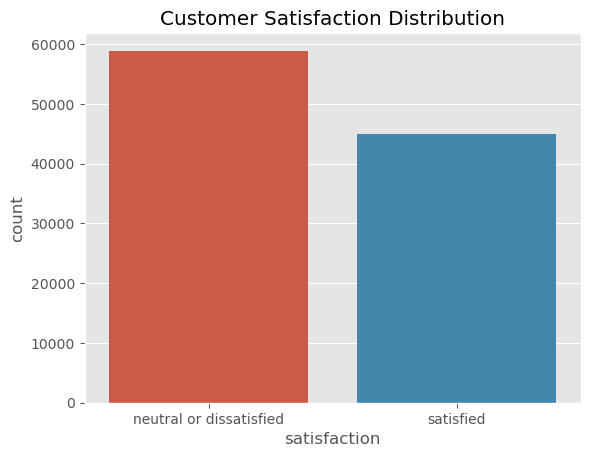

In [8]:
# Visualize satisfaction
sns.countplot(x='satisfaction', data=train_data)
plt.title('Customer Satisfaction Distribution')
plt.show()

Figure 1: 


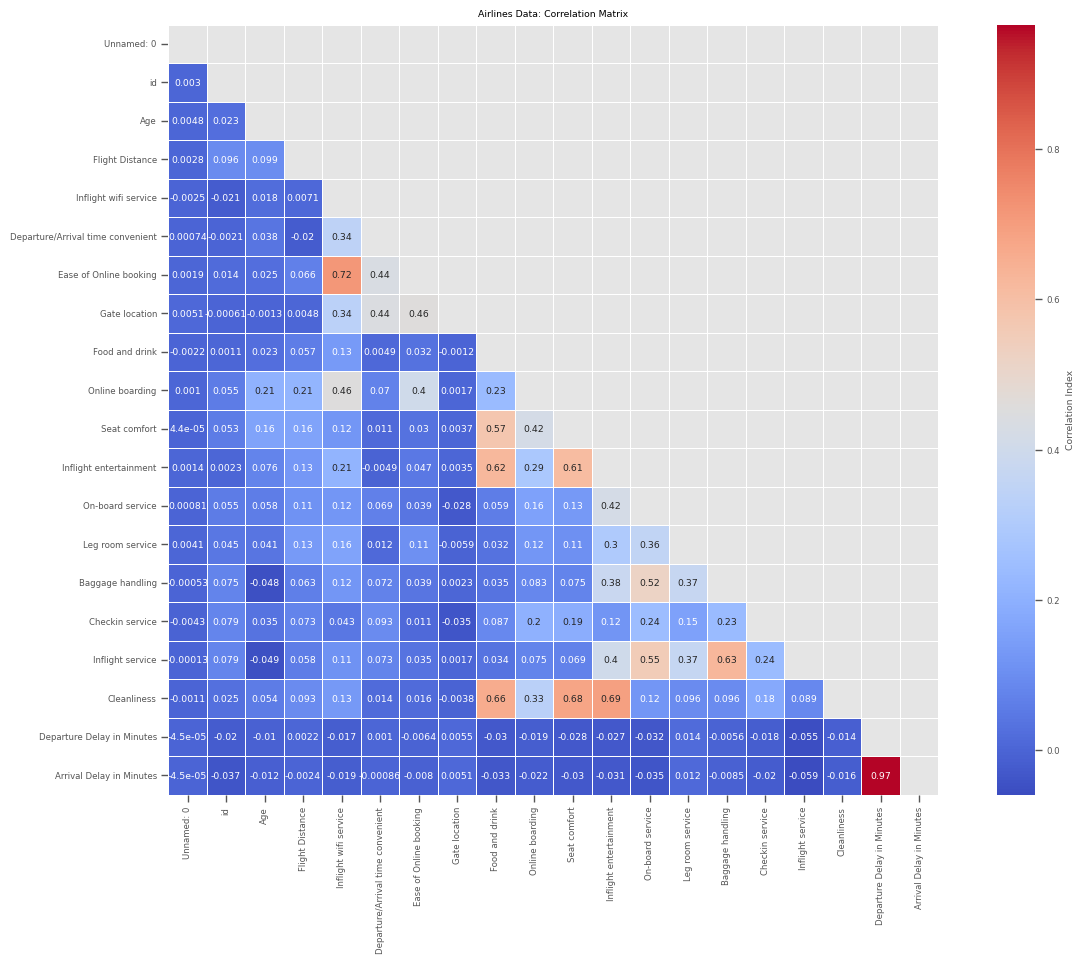

In [9]:
# We can check for multi-colinearity within the dataset, using a 
# correlation matrix
print("\033[1m"+'Figure 1: \
'+"\033[1m")
corr = train_data.corr()

#sns.heatmap(corr, annot=True, mask=matrix)
sns.set_context('paper', font_scale=0.7)
plt.figure(figsize=(15,10))
plt.tight_layout(pad = 10, w_pad=10, h_pad=10)
matrix = np.triu(corr)
plt.title('Airlines Data: Correlation Matrix')
sns.heatmap(train_data.corr(method='pearson'), annot=True,
    linewidths=.5, cmap="coolwarm", mask=matrix,
    square=True, cbar_kws={'label': 'Correlation Index'})

plt.show()

Figure 5: 


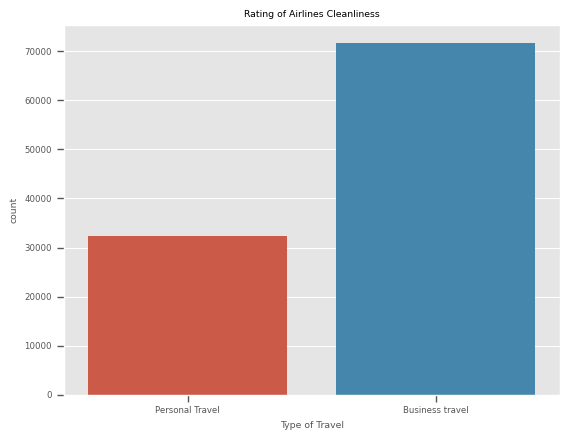

In [10]:
# Visualize travel types
print("\033[1m"+'Figure 5: \
'+"\033[1m")
sns.countplot(x='Type of Travel', data=train_data)
plt.title('Rating of Airlines Cleanliness')
plt.show()


                                Distributions of Rating Features                               



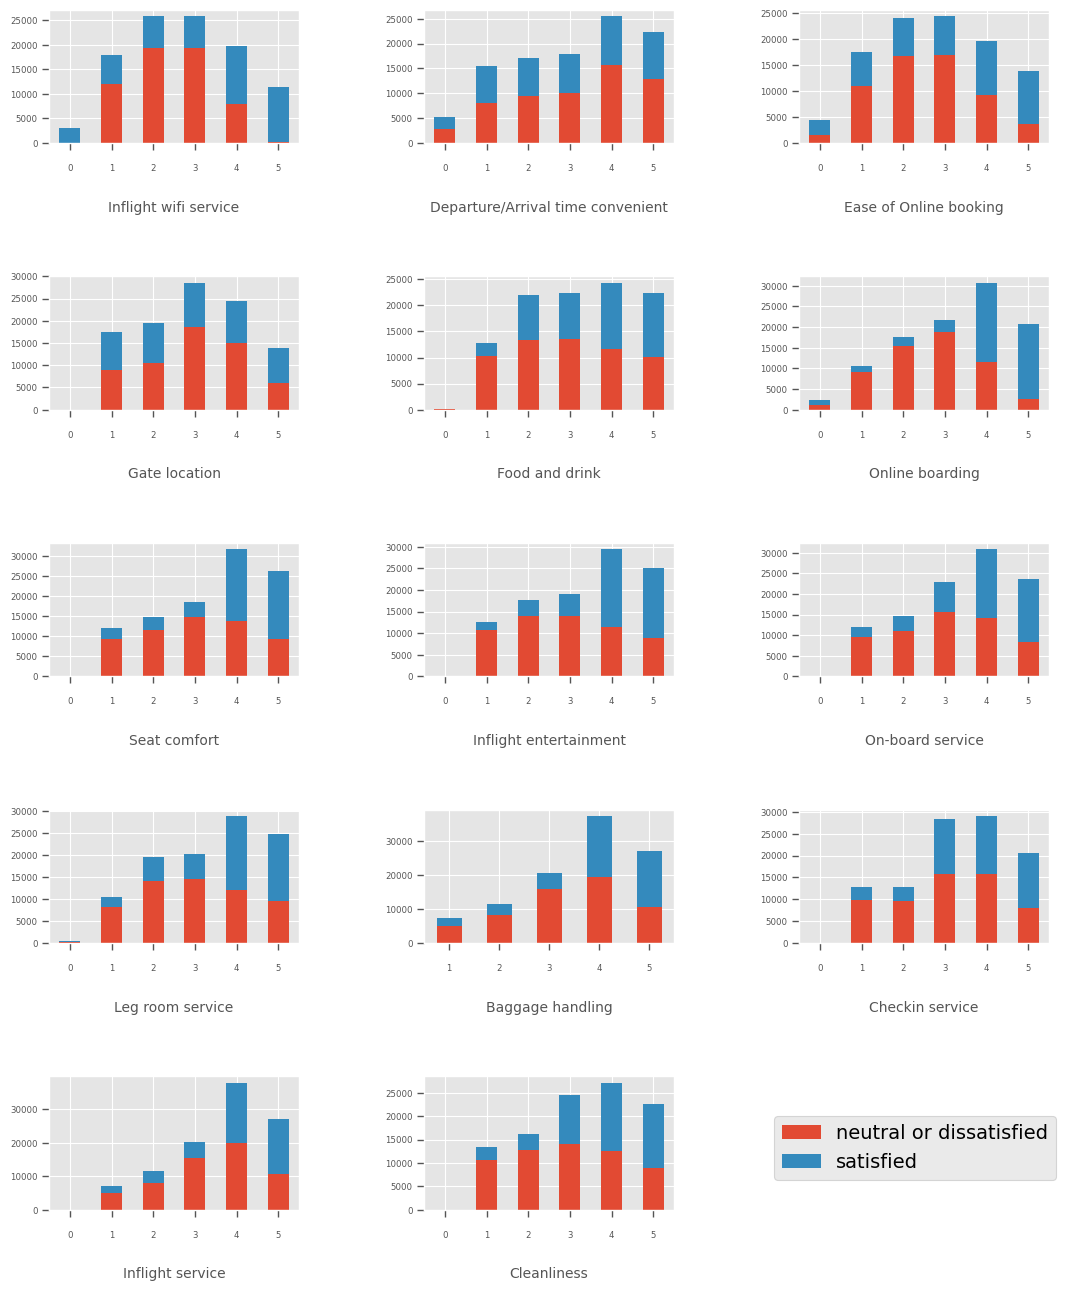

In [11]:
# Plot Distributions of Rating Features

# Create df with rating features

ratings_feats = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                 'Ease of Online booking', 'Gate location', 'Food and drink', 
                 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                 'On-board service', 'Leg room service', 'Baggage handling', 
                 'Checkin service', 'Inflight service', 'Cleanliness']

ratings_df = train_data.copy()
ratings_df = ratings_df[ratings_feats]

# Create subplots

fig, axs = plt.subplots(5, 3, constrained_layout = True, figsize=(5,15))

# Create stacked bar graph for each rating feature via satisfaction

for ax,(columnName,columnData) in zip(axs.flat, ratings_df.iteritems()):
    grouped = train_data.groupby([ columnName, 'satisfaction']) \
              .size().reset_index() \
              .pivot(columns = 'satisfaction', index = columnName, values = 0)
    grouped.plot(ax = ax, kind = 'bar', stacked = True)
    ax.tick_params(axis='x', pad=10, rotation = 0)
    ax.xaxis.labelpad = 20
    ax.xaxis.get_label().set_fontsize(10)
    ax.get_legend().remove()
    
# Tidy plot layout

fig.subplots_adjust(left=2, bottom=1.2, right=4, top=2, wspace=0.5, hspace=1)
for x in axs.flat:
    x.set(ylabel='')

# Blank the last subplot and fix legend

axs[-1, -1].axis('off')
axs[4, 1].legend(bbox_to_anchor=(1.4, 0.7), 
                 loc='upper left', 
                 borderaxespad=0, 
                 prop={'size': 14})

# Display charts

title = 'Distributions of Rating Features'
x = title.center(95)
print('\n'+ "\033[1m" + x + "\033[1m" + '\n')
fig.show()


Number of Departure Delays Over 3 Hours: 1055


Number of Arrival Delays Over 3 Hours: 1081


                                  Distributions of Rating Features                                  



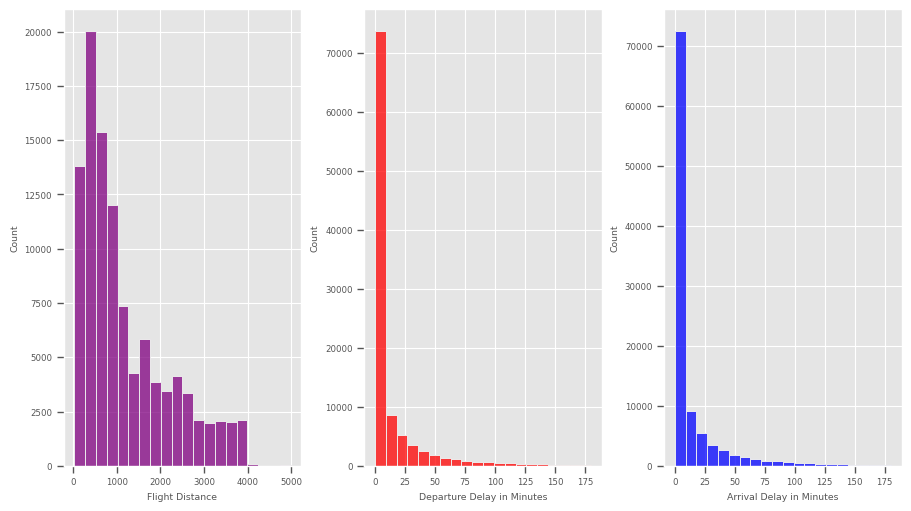

In [12]:
# Plot Continuous Feature Distributions

# Remove outliers from departure and arrival delays

super_late_dep = train_data.loc[train_data['Departure Delay in Minutes'] > 180]
drop_dep = list(super_late_dep.index.values) 
train_data_dep = train_data.copy()
train_data_dep.drop(axis=0, inplace=True, index=drop_dep)

super_late_arr = train_data.loc[train_data['Arrival Delay in Minutes'] > 180]
drop_arr = list(super_late_arr.index.values) 
train_data_arr = train_data.copy()
train_data_arr.drop(axis=0, inplace=True, index=drop_arr)

# Print amount of rows removed for reference

print("\n\033[1m" + 'Number of Departure Delays Over 3 Hours: ' + \
      str(super_late_dep.shape[0]) + "\033[1m\n")
print("\n\033[1m" + 'Number of Arrival Delays Over 3 Hours: ' + \
      str(super_late_arr.shape[0]) + "\033[1m\n")

# Create subplots

fig, axs = plt.subplots(1, 3, constrained_layout = True, figsize=(9,5))

sns.histplot(train_data['Flight Distance'], bins=20, ax=axs[0], color="purple")
sns.histplot(train_data_dep['Departure Delay in Minutes'], bins = 20, ax=axs[1], color="red")
sns.histplot(train_data_arr['Arrival Delay in Minutes'], bins=20, ax=axs[2], color="blue")

# Display graphs

title = 'Distributions of Rating Features'
x = title.center(100)
print('\n'+ "\033[1m" + x  + "\033[1m" + '\n')
fig.show()

### Data Pre-processing

The first step of preprocessing is to convert the feature column headers into something more work friendly, removing periods and spaces, making them fully uppercase, and removing irrelevant features. Based on the data exploration conducted above we notice that the features responsible for ratings are not all on the same scale. Since ratings typically range from 1-5 when evaluating satisfaction, it is plausible that the 0 values of those variables were user-error and it is also noticable that 0s are rarely present as opposed to other values. To address this we set all of the relevant features to a Likert scale by swapping the 0 values for 1.

We continue the pre-processing stage by converting the binary features to 0 and one. The columns this applies to includes Gender, Customer Type, Type of Travel, and Satisfaction. Furthermore, the Class feature has only three possible values which are swapped for ordinal values of 1, 2, and 3, for Economy, Economy Plus, and Business Class respectively. The missing values in the Arrival Delay in Minutes are imputed with median values of the feature because the mean may be sensitive to the outliers present (as seen in the histogram above) and there are less than half a percentage of values to handle in regards to the 100,000 row data set. Finally, we split the data set into training and validation sets based on a 60-40 split.

In [13]:
def getUniqValues(df):
    '''
    Create function to check for unique values in 
    each column. numpy.unique() gets unique values in
    multiple columns. Returns dataframe with 
    unique values
    '''
    feats = list(df.columns)
    uniqs = []
    
    for feat in feats:
        varUniqs = df[feat].unique() 
        uniqs.append([
            feat,
            varUniqs])
        
    return pd.DataFrame(uniqs, columns = ['Feature', 'Unique Values'])

In [14]:
# Display unique values in data frame
uniqs_df = getUniqValues(airline_df)
display(uniqs_df)

,Feature,Unique Values
0,ID,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
1,GENDER,"[Male, Female]"
2,CUSTOMER_TYPE,"[Loyal Customer, disloyal Customer]"
3,AGE,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
4,TYPE_OF_TRAVEL,"[Personal Travel, Business travel]"
5,CLASS,"[Eco Plus, Business, Eco]"
6,FLIGHT_DISTANCE,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
7,INFLIGHT_WIFI_SERVICE,"[3, 2, 4, 1, 5, 0]"
8,DEPARTURE/ARRIVAL_TIME_CONVENIENT,"[4, 2, 5, 3, 1, 0]"
9,EASE_OF_ONLINE_BOOKING,"[3, 2, 5, 4, 1, 0]"


In [15]:
# Features to convert to likert scale
likert_feats = ['INFLIGHT_WIFI_SERVICE', 'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 'EASE_OF_ONLINE_BOOKING',
                'GATE_LOCATION', 'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT', 
                'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE', 'BAGGAGE_HANDLING', 'CHECKIN_SERVICE', 'INFLIGHT_SERVICE',
                'CLEANLINESS']

# pre-process likert features
process_df = airline_df.copy()
process_df = process_df[likert_feats].replace(['0', 0], 1)

# confirm new unique values
uni_pro = getUniqValues(process_df)
uni_pro

,Feature,Unique Values
0,INFLIGHT_WIFI_SERVICE,"[3, 2, 4, 1, 5]"
1,DEPARTURE/ARRIVAL_TIME_CONVENIENT,"[4, 2, 5, 3, 1]"
2,EASE_OF_ONLINE_BOOKING,"[3, 2, 5, 4, 1]"
3,GATE_LOCATION,"[1, 3, 2, 5, 4]"
4,FOOD_AND_DRINK,"[5, 1, 2, 4, 3]"
5,ONLINE_BOARDING,"[3, 5, 2, 1, 4]"
6,SEAT_COMFORT,"[5, 1, 2, 3, 4]"
7,INFLIGHT_ENTERTAINMENT,"[5, 1, 2, 3, 4]"
8,ON-BOARD_SERVICE,"[4, 1, 2, 3, 5]"
9,LEG_ROOM_SERVICE,"[3, 5, 4, 2, 1]"


In [17]:
# Combine the processed dataframe with the original and reorganize
likert_df = airline_df.copy()
satisfaction_col = likert_df['SATISFACTION']
likert_df = likert_df.drop(columns = likert_feats)
likert_df = likert_df.drop(columns=['SATISFACTION'])

new_airlines_df = pd.concat([likert_df, process_df], axis = 1)
new_airlines_df['SATISFACTION'] = satisfaction_col

# Check new data set
new_airlines_df.head()

,ID,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,INFLIGHT_WIFI_SERVICE,...,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,SATISFACTION
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25,18.0,3,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,1,6.0,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,0,0.0,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,11,9.0,2,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,0,0.0,3,...,5,5,3,3,4,4,3,3,3,satisfied


In [18]:
# Transform features inton numerical values
airline_df['GENDER'] = airline_df['GENDER'].replace(['Male'], 0)
airline_df['GENDER'] = airline_df['GENDER'].replace(['Female'], 1)

airline_df['CUSTOMER_TYPE'] = airline_df['CUSTOMER_TYPE'].replace(['disloyal Customer'], 0)
airline_df['CUSTOMER_TYPE'] = airline_df['CUSTOMER_TYPE'].replace(['Loyal Customer'], 1)
airline_df['TYPE_OF_TRAVEL'] = airline_df['TYPE_OF_TRAVEL'].replace(['Personal Travel'], 0)
airline_df['TYPE_OF_TRAVEL'] = airline_df['TYPE_OF_TRAVEL'].replace(['Business travel'], 1)

airline_df['CLASS']= airline_df['CLASS'].replace(['Business'], '0')
airline_df['CLASS'] = airline_df['CLASS'].replace(['Eco Plus'], '1')
airline_df['CLASS'] = airline_df['CLASS'].replace(['Eco'], '2')

airline_df['SATISFACTION']= airline_df['SATISFACTION'].replace(['neutral or dissatisfied'], 0)
airline_df['SATISFACTION'] = airline_df['SATISFACTION'].replace(['satisfied'], 1)

In [19]:
# Remove missing values using sklearn simple imputer
from sklearn.impute import SimpleImputer

# Mean Imputation
df_mean = airline_df.copy()
mean_imputer = SimpleImputer(strategy='median')
df_mean['ARRIVAL_DELAY_IN_MINUTES'] = mean_imputer.fit_transform(
    df_mean['ARRIVAL_DELAY_IN_MINUTES'].values.reshape(-1,1))

In [20]:
# Check if values were imputed
df_mean.isnull().sum()

ID                                   0
GENDER                               0
CUSTOMER_TYPE                        0
AGE                                  0
TYPE_OF_TRAVEL                       0
CLASS                                0
FLIGHT_DISTANCE                      0
INFLIGHT_WIFI_SERVICE                0
DEPARTURE/ARRIVAL_TIME_CONVENIENT    0
EASE_OF_ONLINE_BOOKING               0
GATE_LOCATION                        0
FOOD_AND_DRINK                       0
ONLINE_BOARDING                      0
SEAT_COMFORT                         0
INFLIGHT_ENTERTAINMENT               0
ON-BOARD_SERVICE                     0
LEG_ROOM_SERVICE                     0
BAGGAGE_HANDLING                     0
CHECKIN_SERVICE                      0
INFLIGHT_SERVICE                     0
CLEANLINESS                          0
DEPARTURE_DELAY_IN_MINUTES           0
ARRIVAL_DELAY_IN_MINUTES             0
SATISFACTION                         0
dtype: int64

In [21]:
# Split df_mean data into features and outcome varible, then scale
# and standardize features that will be used for modeling, split
# dataset, 60/40 for train and validation

predictors = df_mean.drop(columns = ['SATISFACTION'])
outcome = df_mean['SATISFACTION']

outcome = outcome.astype(int)

SEED = 4
train_X, valid_X, train_y, valid_y = train_test_split(predictors, outcome, 
                                                      test_size=0.4,
                                                      random_state=SEED)

ID                                     int64
GENDER                                 int64
CUSTOMER_TYPE                          int64
AGE                                    int64
TYPE_OF_TRAVEL                         int64
CLASS                                 object
FLIGHT_DISTANCE                        int64
INFLIGHT_WIFI_SERVICE                  int64
DEPARTURE/ARRIVAL_TIME_CONVENIENT      int64
EASE_OF_ONLINE_BOOKING                 int64
GATE_LOCATION                          int64
FOOD_AND_DRINK                         int64
ONLINE_BOARDING                        int64
SEAT_COMFORT                           int64
INFLIGHT_ENTERTAINMENT                 int64
ON-BOARD_SERVICE                       int64
LEG_ROOM_SERVICE                       int64
BAGGAGE_HANDLING                       int64
CHECKIN_SERVICE                        int64
INFLIGHT_SERVICE                       int64
CLEANLINESS                            int64
DEPARTURE_DELAY_IN_MINUTES             int64
ARRIVAL_DE

### Baseline

In order to establish a benchmark to cross-reference the models that will be trained, a baseline model needs to be created. To achieve this we will iterate through the variables available utilizing Logistic Regression and evaluate them based on their Akaike Information Criterion (AIC) score. Since the goal is to create a classification model, the degrees of freedom assigned for determining the AIC score will be 1. Since we have a very large data set with only 25 features, backward_elimination may be best for deriving the best variables for our baseline model. This model will be built out using the Lasso Regression, denoted by the penalty parameter of "l1". This was chosen as opposed to Ridge Regression ("l2") since the rating features show signs of multicollinearity and it will ease automation of our feature selection.

The result of iterating through multiple training models, based on the backward elimination process, concluded that the "Age", "Departure Delay in Minutes", and "Flight Distance" features should be removed. The model based on the remaining (best) variables was then evaluated based on accuracy of predictions, arriving at an accuracy metric of 87.75% for the training set and 87.35% for the validation set. This will serve as the benchmark for comparisons of the following models trained.

Baseline models serve as benchmarks for datasets one is working on to help determine whether a certain model is good or bad. Baseline models also can indicate whether or the data is insufficient. For example, if a model fails to at least meet the baseline model it could indicate that the dataset itself lacks the predictive power needed. We chose to use a Logistic Regression model as our baseline model and the base score we wanted to beat. It is a common model used to estimate the probability of an instance belongs to a particular class. Logistic Regression models are for both training and prediction, probability scores, and does not require you to scale the features. 

In [22]:
def train_model(variables):
    '''
    
    Create function to fit logistic regression using 
    avaible features. 
    
    '''
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty='l1',
                               C=1e42,
                               solver='liblinear',
                               random_state=4)
    model.fit(train_X[variables], train_y)
    return model


def score_model(model, variables):
    '''
    
    Create function to score model performance based
    on AIC score
    
    '''
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)


# Get the best model using backward_elimination
best_model, best_variables = backward_elimination(train_X.columns, train_model, 
                                                  score_model, verbose=True)

print("\nBest Variables Based on Backward Elimination: \n\n{}".format(best_variables))

Variables: ID, GENDER, CUSTOMER_TYPE, AGE, TYPE_OF_TRAVEL, CLASS, FLIGHT_DISTANCE, INFLIGHT_WIFI_SERVICE, DEPARTURE/ARRIVAL_TIME_CONVENIENT, EASE_OF_ONLINE_BOOKING, GATE_LOCATION, FOOD_AND_DRINK, ONLINE_BOARDING, SEAT_COMFORT, INFLIGHT_ENTERTAINMENT, ON-BOARD_SERVICE, LEG_ROOM_SERVICE, BAGGAGE_HANDLING, CHECKIN_SERVICE, INFLIGHT_SERVICE, CLEANLINESS, DEPARTURE_DELAY_IN_MINUTES, ARRIVAL_DELAY_IN_MINUTES
Start: score=46428.48
Step: score=46282.31, remove AGE
Step: score=46095.04, remove DEPARTURE_DELAY_IN_MINUTES
Step: score=46046.09, remove FLIGHT_DISTANCE
Step: score=46046.09, remove None

Best Variables Based on Backward Elimination: 

['ID', 'GENDER', 'CUSTOMER_TYPE', 'TYPE_OF_TRAVEL', 'CLASS', 'INFLIGHT_WIFI_SERVICE', 'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 'EASE_OF_ONLINE_BOOKING', 'GATE_LOCATION', 'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT', 'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE', 'BAGGAGE_HANDLING', 'CHECKIN_SERVICE', 'INFLIGHT_SERVICE', 'CLEANLINES

In [23]:
# Baseline model logistic regression, performance on training and validation set
logit_train = train_X[best_variables]
logit_valid = valid_X[best_variables]

logit = LogisticRegression(penalty='l1',
                           C=1e42,
                           solver='liblinear',
                           random_state=4)
logit.fit(logit_train, train_y)

print("\033[1m"+'Baseline Model Performance Training: \
'+"\033[1m")
print(classificationSummary(train_y, logit.predict(logit_train)))
print("\033[1m"+'Baseline Model Performance Validation: \
'+"\033[1m")
print(classificationSummary(valid_y, logit.predict(logit_valid)))

Baseline Model Performance Training: 
Confusion Matrix (Accuracy 0.8775)

       Prediction
Actual     0     1
     0 31975  3301
     1  4338 22728
None
Baseline Model Performance Validation: 
Confusion Matrix (Accuracy 0.8735)

       Prediction
Actual     0     1
     0 21279  2324
     1  2933 15026
None


In [65]:
# Create subset of features based on best variable
back_train = logit_train.copy()

# Standardize them
scaler = StandardScaler()
back_train = scaler.fit_transform(back_train)

<div class="alert alert-block alert-info">
    <b>Baseline Validation Accuracy:</b> 87.35%
</div>

### Modeling


**[Random Forests for Feature Importance]**

A Random Forest model is a model that splits the on a subset of features on each split. They are very flexible and easy to use model that can produce great results. A Random Forest builds multiple decision trees and merges them together to get a much more reliable prediction. It works great with high dimensional data and it is faster to train than decision trees. Predictions are also done at a very fast speed because the forests generated can be saved for future use. 

In [24]:
rf = RandomForestClassifier(n_estimators=500, random_state=SEED)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=4)

,Feature,Importance,Std
1,GENDER,0.004092,0.001727
21,DEPARTURE_DELAY_IN_MINUTES,0.010038,0.001290
22,ARRIVAL_DELAY_IN_MINUTES,0.011627,0.001641
11,FOOD_AND_DRINK,0.011657,0.005404
10,GATE_LOCATION,0.014735,0.007026
8,DEPARTURE/ARRIVAL_TIME_CONVENIENT,0.016865,0.013456
19,INFLIGHT_SERVICE,0.022847,0.016877
18,CHECKIN_SERVICE,0.022971,0.008975
17,BAGGAGE_HANDLING,0.023303,0.017118
20,CLEANLINESS,0.024728,0.019937


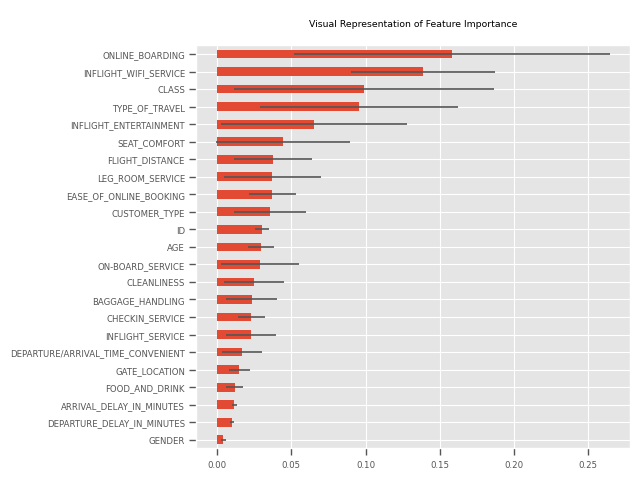

In [25]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'Feature': train_X.columns, 'Importance': importances, 'Std': std})
df = df.sort_values('Importance')
display(df)

ax = df.plot(kind='barh', xerr='Std', x='Feature', legend=False)
ax.set_ylabel('')

plt.title('\nVisual Representation of Feature Importance\n')
plt.tight_layout()
plt.show()

In [60]:
print("\033[1m"+'Random Forests Model Validation: \
'+"\033[1m")

print(classificationSummary(valid_y, rf.predict(valid_X)))

Random Forests Model Validation: 
Confusion Matrix (Accuracy 0.9627)

       Prediction
Actual     0     1
     0 23092   511
     1  1039 16920
None


In [61]:
# Create subset of features based on 6 most important
top_6 = ['INFLIGHT_WIFI_SERVICE', 'TYPE_OF_TRAVEL', 'EASE_OF_ONLINE_BOOKING', 
         'ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT']
rf6_train = train_X[top_6]

# Standardize them
scaler = StandardScaler()
rf6_train = scaler.fit_transform(rf6_train)
rf6_train

array([[-1.30073271, -1.48806371, -1.25704031, -1.67211645, -1.09166579,
        -1.01572363],
       [ 1.71500899, -1.48806371,  1.60440515,  1.29794121,  0.42341404,
         0.48400383],
       [-0.54679728, -1.48806371,  0.17368242, -0.18708762,  1.18095396,
         1.23386756],
       ...,
       [ 0.20713814,  0.67201424, -0.54167894, -0.18708762, -0.33412587,
        -0.2658599 ],
       [ 0.20713814,  0.67201424,  0.17368242, -0.18708762,  0.42341404,
         0.48400383],
       [ 0.96107356, -1.48806371, -1.97240167,  0.55542679,  1.18095396,
        -1.01572363]])

**[Gradient Boosting]**

Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole. It is such a powerful algortihm that it can find any nonlinear relationship between the model target and features. It can also deal with missing values, outliers and high cardinality categorical values on features.

In [27]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

print("\033[1m"+'Boosting Model Performance Training: \
'+"\033[1m")

print(classificationSummary(train_y, boost.predict(train_X)))

print("\033[1m"+'Boosting Model Performance Validation: \
'+"\033[1m")

print(classification_report(valid_y, boost.predict(valid_X)))

Boosting Model Performance Training: 
Confusion Matrix (Accuracy 0.9443)

       Prediction
Actual     0     1
     0 33874  1402
     1  2072 24994
None
Boosting Model Performance Validation: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     23603
           1       0.94      0.92      0.93     17959

    accuracy                           0.94     41562
   macro avg       0.94      0.94      0.94     41562
weighted avg       0.94      0.94      0.94     41562



<div class="alert alert-block alert-info">
    <b>Boosting Validation Accuracy:</b> 94.43%
</div>

<div class="alert alert-block alert-info">
    <b>Boosting Validation F1-Score:</b> 93%
</div>

In [71]:
# Fit model to subsets of features for testing

# Based on Random Forest
rf_boost = GradientBoostingClassifier()
rf_boost.fit(rf6_train, train_y)

# Based on Backward Elimination
back_boost = GradientBoostingClassifier()
back_boost.fit(back_train, train_y)

GradientBoostingClassifier()

**[k-Nearest Neighbors]**

K-Nearest Neighbors is a lazy-learner that simply stores the initial training data set in order to use it at the time of classification. This supervised machine learning algorithm has two advantages: (1) it tends to perform well with large data sets, which is great since the data set in question has over 100K values; (2) it is non-parametric, meaning that no specific data distribution is necessary in order for it to work. In order to construct a KNN model a few tasks need to be carried out. The first task is standardizing the variables used, since the scales of the continuous and categorical variables greatly differ from one another. Second, the optimal k-value needs to be determined and can be done via an iterative approach or by utilizing GridSearchCV. In our case we will start with GridSearchCV to determine the optimal parameters and then iterate through more viable k-values based on the optimal k returned.

Based on the iterations following the grid search for the best parameters, we can observe various performance metrics for n_neighbors ranging from 7 to 14. These performance metrics include the usual accuracy score, as well as precision and recall. A higher precision score denotes the model is able to better predicted whether a person will be satisfied while a higher recall signifies there are fewer false negatives. From the results we can see the metrics were all very similar. We can note that a k-value of 12 yielded the best precision score at 95.57% (best at predicting a satisfied customer), a k-value of 14 yielded the highest accuracy at 93.77%, and a k-value of 8 had the best recall score at 89.95% (fewest false negatives). Since predicting satisfied customers is most important for us, we will go with the k-value of 12.

In [28]:
# Scale the available features using MinMaxScaler, 
# since not all features are normally distributed
mm_scaler = MinMaxScaler()

train_minmax = mm_scaler.fit_transform(train_X)
valid_minmax = mm_scaler.fit_transform(valid_X)

In [29]:
# Implement GridSearch with varying parameters
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': [5, 10, 15], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
}

# Run initial grid search to gauge current best score and params to expand upon
gridSearch = GridSearchCV(KNeighborsClassifier(), 
                          param_grid, 
                          cv=5, 
                          n_jobs=-1,
                          verbose=1)

gridSearch.fit(train_minmax, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial best parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Initial score:  0.9346186627533107
Initial best parameters:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [32]:
# Based on the initial best parameters we proceed to iterate through alternative k-values
    # {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}    
for r in range (7, 15): 
    
    # Fit the model to the training set for each neighbor iteration
    knn = KNeighborsClassifier(n_neighbors=r, metric='manhattan', weights='distance')
    knn.fit(train_minmax, train_y)
    
    # Obtain prediction for the model
    knn_pred = knn.predict(valid_minmax)
    
    # Get the metrics
    print(f'\n Amount of Neighbors: {r}')
    print(f'\n Accuracy: {accuracy_score(valid_y, knn_pred)}')
    print(f'\n Precision: {precision_score(valid_y, knn_pred, zero_division=0)}')
    print(f'\n Recall: {recall_score(valid_y, knn_pred, zero_division=1)}')
    print('\n')


 Amount of Neighbors: 7

 Accuracy: 0.9357586256676772

 Precision: 0.9509231404471185

 Recall: 0.8976557714794811



 Amount of Neighbors: 8

 Accuracy: 0.9369135267792695

 Precision: 0.9518058092264184

 Recall: 0.8995489726599477



 Amount of Neighbors: 9

 Accuracy: 0.9372744333766422

 Precision: 0.9538789025543992

 Recall: 0.8982682777437496



 Amount of Neighbors: 10

 Accuracy: 0.9373947355757664

 Precision: 0.9534636508592689

 Recall: 0.8989921487833399



 Amount of Neighbors: 11

 Accuracy: 0.9367210432606708

 Precision: 0.9541925925925926

 Recall: 0.8965978061139261



 Amount of Neighbors: 12

 Accuracy: 0.9376594004138395

 Precision: 0.9557532621589561

 Recall: 0.8972659947658556



 Amount of Neighbors: 13

 Accuracy: 0.9369135267792695

 Precision: 0.9552930000593719

 Recall: 0.8959296174619967



 Amount of Neighbors: 14

 Accuracy: 0.9377075212934892

 Precision: 0.9554883831199621

 Recall: 0.8976557714794811




In [33]:
# Fit the model with optimal parameters
knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
knn.fit(train_minmax, train_y)

# Obtain metrics for the model training and validation sets
print("\n\033[1m" + 'KNN Validation Set Metrics:' + "\033[1m\n")
print(classification_report(valid_y, knn.predict(valid_minmax)))


KNN Validation Set Metrics:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23603
           1       0.96      0.90      0.93     17959

    accuracy                           0.94     41562
   macro avg       0.94      0.93      0.94     41562
weighted avg       0.94      0.94      0.94     41562



<div class="alert alert-block alert-info">
    <b>KNN Validation Accuracy:</b> 94%
</div>

<div class="alert alert-block alert-info">
    <b>KNN Validation F1:</b> 93%
</div>

In [70]:
# Fit best model to subsets of features for testing

# Based on Random Forest
rf_knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
rf_knn.fit(rf6_train, train_y)

# Based on Backward Elimination
back_knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
back_knn.fit(back_train, train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

**[Neural Network]**

We will now be implementing an artificial neural network consisting of multiple layers. These layers include the input layers, hidden layers, and the output layer. For this method, we are going to use a multilayer perceptron classification algorithm (MLP). The MLP algorithm uses back-propagation for training. Back-propagation is used to optimize the weights within the hidden layers of the neural network.  For the neural network to achieve its predictive power, we need to use an activation function which allows for the model to capture non-linearities. Since we are trying different parameters, we will try using both the Rectified Linear Activation (ReLu) as well as the tanh function which are perfect for two class problems. One of the reasons we use the ReLu function is due to the fact that it is more computationally efficient. Another reason is due to the notion of  “dying neurons”. During back-propagation, some of the neurons do not get activated, hence the creation of dying neurons. The ReLu function will keep neurons from becoming unused. The tanh function is a similar to the logistic sigmoid function but better. 

To optimize the model deeper, we can also use the “adam” value for the optimizer parameter as it is a simple optimizer and the default method. We set the epochs or iterations to 100. This means that the neural network is going to run for 100 epochs or 100 iterations before converging. We define 10 external and 10 internal nodes or hidden layers. These hidden layers are used for combining the networks outputs or weights. There are two different activation functions we are testing out; the relu function, and the tangent function. An optimizer determines how the network will be updated based on the loss function. For the optimizer we are using adam. After tuning parameters, the network did not converge. It is clear the network did not generalize well to the data, giving a poor performance. We did however recieve an optimal set of parameters which we will run on the test set. The accuracy given by the network was 57% with an F-1 score of 72%. 

In [73]:
# Standardize features and outcome variable for neural network
scaler = StandardScaler()
train_X_scale = scaler.fit_transform(train_X)

In [74]:
# Nueral network with different parameter values
mlp_classifier = MLPClassifier(max_iter=1000, 
                               random_state=SEED)
parameters = {
    'hidden_layer_sizes': [(10, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

network_cv = GridSearchCV(mlp_classifier,
                         parameters,
                         n_jobs=-1,
                         cv=5)
network_cv.fit(train_X_scale, train_y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=4),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']})

In [75]:
print("\033[1m"+'Best Parameters: \
'+"\033[1m")
print(network_cv.best_params_)

Best Parameters: 
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [76]:
# All scores for different combinations
means = network_cv.cv_results_['mean_test_score']
stds = network_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, network_cv.cv_results_['params']):
    print("\n%0.3f (+/-%0.03f) for %r\n" % (mean, std * 2, params))


0.957 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


0.957 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


0.955 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


0.955 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


0.956 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


0.956 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


0.956 (+/-0.003) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


0.956 (+/-0

In [77]:
# Run model on training set

    # Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10),
                    # 'learning_rate': 'constant', 'solver': 'adam'}

y_true, y_pred = train_y , network_cv.predict(train_X)
print("\033[1m"+'Training Set Results: \
'+"\033[1m")
print(classification_report(y_true, y_pred))

Training Set Results: 
              precision    recall  f1-score   support

           0       0.67      0.29      0.41     35276
           1       0.47      0.81      0.59     27066

    accuracy                           0.52     62342
   macro avg       0.57      0.55      0.50     62342
weighted avg       0.58      0.52      0.49     62342



In [78]:
# Run model on validation set
y_true, y_pred = valid_y , network_cv.predict(valid_X)
print("\033[1m"+'Validation Set Results: \
'+"\033[1m")
print(classification_report(y_true, y_pred))

Validation Set Results: 
              precision    recall  f1-score   support

           0       0.67      0.29      0.41     23603
           1       0.46      0.81      0.59     17959

    accuracy                           0.52     41562
   macro avg       0.57      0.55      0.50     41562
weighted avg       0.58      0.52      0.49     41562



Figure 9: 


<Figure size 700x700 with 0 Axes>

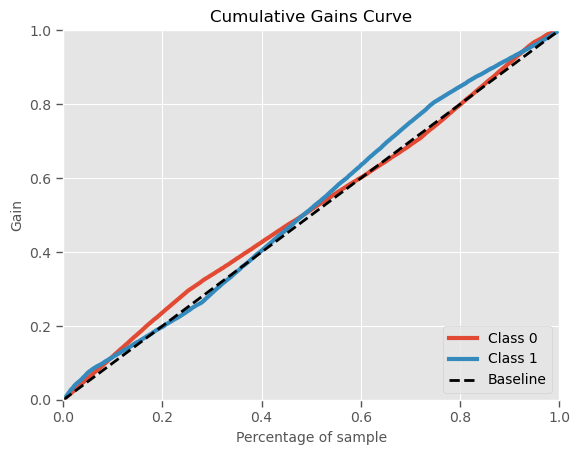

In [80]:
# Gains curve for neural network
# Output probabilities
import scikitplot as skplt

print("\033[1m"+'Figure 9: \
'+"\033[1m")
valid_X_scale = scaler.fit_transform(valid_X)
predProb = network_cv.predict_proba(valid_X)
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(valid_y, predProb)
plt.show()

<div class="alert alert-block alert-info">
    <b>Neural Network Validation Accuracy:</b> 52%
</div>

<div class="alert alert-block alert-info">
    <b>Neural Network F1-Score:</b> 59%
</div>

In [81]:
# Fit best model to subsets of features for testing

# Based on Random Forest
# rf_neural = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
rf_neural = network_cv.fit(rf6_train, train_y)

# Based on Backward Elimination
# back_knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
back_neural = network_cv.fit(back_train, train_y)

### Model Evaluation Test Set

In [105]:
# Preprocess feautures choosen from random forest to use for\
# testing best model parameters, we can start by doing the same we
# did by cleaning up the differet features in the data
# Duplicate original data set for adjustments
test_df = test_data.copy()

# Remove periods and spaces in column headers
test_df.columns = [c.replace(' ', '_').replace('.', '') for c in test_df.columns]

# Convert all column headers to uppercase
test_df.columns = [h.upper() for h in test_df.columns]

# Drop 'UNNAMED:_0'
test_df = test_df.drop(columns=["UNNAMED:_0"])

In [106]:
# Display unique values in data frame
uniqs_df2 = getUniqValues(test_df)
display(uniqs_df2)

,Feature,Unique Values
0,ID,"[19556, 90035, 12360, 77959, 36875, 39177, 794..."
1,GENDER,"[Female, Male]"
2,CUSTOMER_TYPE,"[Loyal Customer, disloyal Customer]"
3,AGE,"[52, 36, 20, 44, 49, 16, 77, 43, 47, 46, 33, 6..."
4,TYPE_OF_TRAVEL,"[Business travel, Personal Travel]"
5,CLASS,"[Eco, Business, Eco Plus]"
6,FLIGHT_DISTANCE,"[160, 2863, 192, 3377, 1182, 311, 3987, 2556, ..."
7,INFLIGHT_WIFI_SERVICE,"[5, 1, 2, 0, 3, 4]"
8,DEPARTURE/ARRIVAL_TIME_CONVENIENT,"[4, 1, 0, 3, 5, 2]"
9,EASE_OF_ONLINE_BOOKING,"[3, 2, 0, 4, 5, 1]"


In [107]:
# Features to convert to likert scale
likert_feats_test = ['INFLIGHT_WIFI_SERVICE', 'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 
                     'EASE_OF_ONLINE_BOOKING', 'GATE_LOCATION', 'FOOD_AND_DRINK', 
                     'ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT', 
                     'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE', 'BAGGAGE_HANDLING', 
                     'CHECKIN_SERVICE', 'INFLIGHT_SERVICE', 'CLEANLINESS']

# pre-process likert features
process_dfTest = test_df.copy()
process_dfTest = process_dfTest[likert_feats_test].replace(['0', 0], 1)

# confirm new unique values

uni_proTest = getUniqValues(process_dfTest)
uni_proTest

,Feature,Unique Values
0,INFLIGHT_WIFI_SERVICE,"[5, 1, 2, 3, 4]"
1,DEPARTURE/ARRIVAL_TIME_CONVENIENT,"[4, 1, 3, 5, 2]"
2,EASE_OF_ONLINE_BOOKING,"[3, 2, 1, 4, 5]"
3,GATE_LOCATION,"[4, 1, 2, 3, 5]"
4,FOOD_AND_DRINK,"[3, 5, 2, 4, 1]"
5,ONLINE_BOARDING,"[4, 2, 1, 5, 3]"
6,SEAT_COMFORT,"[3, 5, 2, 4, 1]"
7,INFLIGHT_ENTERTAINMENT,"[5, 4, 2, 1, 3]"
8,ON-BOARD_SERVICE,"[5, 4, 1, 2, 3]"
9,LEG_ROOM_SERVICE,"[5, 4, 1, 2, 3]"


In [108]:
# Combine the processed dataframe with the original and reorganize
likert_dfTest = test_df.copy()
satisfaction_colTest = likert_dfTest['SATISFACTION']
likert_dfTest = likert_dfTest.drop(columns = likert_feats_test)
likert_dfTest = likert_dfTest.drop(columns=['SATISFACTION'])

new_airlines_dfTest = pd.concat([likert_dfTest, process_dfTest], axis = 1)
new_airlines_dfTest['SATISFACTION'] = satisfaction_colTest

# Check new data set
new_airlines_dfTest.head()

,ID,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,INFLIGHT_WIFI_SERVICE,...,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,SATISFACTION
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,50,44.0,5,...,4,3,5,5,5,5,2,5,5,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,0,0.0,1,...,4,5,4,4,4,4,3,4,5,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,0,0.0,2,...,2,2,2,4,1,3,2,2,2,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,6.0,1,...,4,4,1,1,1,1,3,1,4,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,0,20.0,2,...,1,2,2,2,2,2,4,2,4,satisfied


In [109]:
# Transform features inton numerical values
new_airlines_dfTest['GENDER'] = new_airlines_dfTest['GENDER'].replace(['Male'],0)
new_airlines_dfTest['GENDER'] = new_airlines_dfTest['GENDER'].replace(['Female'],1)

new_airlines_dfTest['CUSTOMER_TYPE'] = new_airlines_dfTest['CUSTOMER_TYPE'].replace(['disloyal Customer'],0)
new_airlines_dfTest['CUSTOMER_TYPE'] = new_airlines_dfTest['CUSTOMER_TYPE'].replace(['Loyal Customer'],1)
new_airlines_dfTest['TYPE_OF_TRAVEL'] = new_airlines_dfTest['TYPE_OF_TRAVEL'].replace(['Personal Travel'],0)
new_airlines_dfTest['TYPE_OF_TRAVEL'] = new_airlines_dfTest['TYPE_OF_TRAVEL'].replace(['Business travel'],1)

new_airlines_dfTest['CLASS']= new_airlines_dfTest['CLASS'].replace(['Business'],'0')
new_airlines_dfTest['CLASS'] = new_airlines_dfTest['CLASS'].replace(['Eco Plus'],'1')
new_airlines_dfTest['CLASS'] = new_airlines_dfTest['CLASS'].replace(['Eco'],'2')

new_airlines_dfTest['SATISFACTION']= new_airlines_dfTest['SATISFACTION'].replace(['neutral or dissatisfied'],0)
new_airlines_dfTest['SATISFACTION'] = new_airlines_dfTest['SATISFACTION'].replace(['satisfied'],1)

In [110]:
# Impute missing values from arrival delay to keep every data point
# Median Imputation

df_median = new_airlines_dfTest.copy()
median_imputer = SimpleImputer(strategy='median')
df_median['ARRIVAL_DELAY_IN_MINUTES'] = median_imputer.fit_transform(
    df_median['ARRIVAL_DELAY_IN_MINUTES'].values.reshape(-1,1))

In [111]:
# Select features and split data for final modeling, scale data
# for optimizing models

rfX = df_median[top_6]
backX = df_median[best_variables]
y = df_median['SATISFACTION']

rfX_scaled = scaler.fit_transform(rfX)
backX_scaled = scaler.fit_transform(backX)

**[Nueral Network Best Parameters]**

Even though the network ran on the training and valdiation set did not generalize well on the data, the grid search cross-validation was able to output an optimal set of parameters. Therefore, using those optimal parameters can give us different results when running the model on the test set. After building an optimal nueral network, we were able to achieve a better score with the test set. The parameters used are as follows; reul for the activation function, hidden layers of 10 internal and external nodes, a constant learning rate, and the adam optimizer.

The best network was able to generalize well on new data. The netowork output an accuracy of 91% as well as an F-1 score of 92%. Meaning that the network was able to classify the negative class with high precision. Although the gains curve shows a high performing positive class, it also displays a high performing negative class. This is good since we want to be able to classify and detect the negative classes primarily. We also ran the same model using 20 features that were choosen by the backward elimination. The same model was able to achive the same results using all 20 features when compared to using just 6. Meaning, we can utilize a more simple model and obtian similar results following the principle of parsimony. 

Neural Model Matrix: 
Confusion Matrix (Accuracy 0.9357)

       Prediction
Actual     0     1
     0 14060   513
     1  1158 10245
None

Neural Model Performance:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.90      0.92     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.94      0.94      0.94     25976



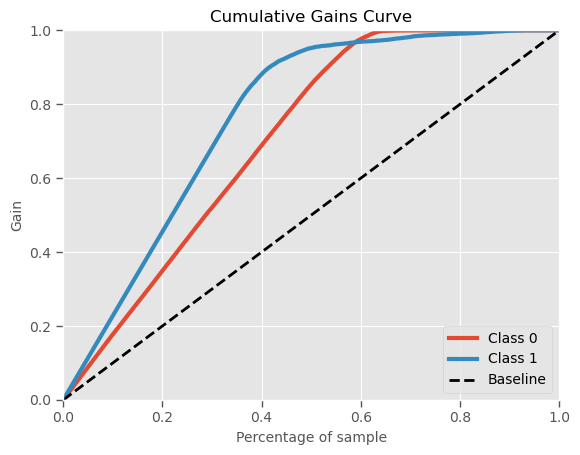

In [119]:
# Evaluate confusion matrix
print("\033[1m"+'Neural Model Matrix: \
'+"\033[1m")
print(classificationSummary(y, back_neural.predict(backX_scaled)))

# Evaluate performance
print("\n\033[1m" + 'Neural Model Performance:' + "\033[1m\n")
print(classification_report(y, back_neural.predict(backX_scaled)))

# Check Gains Chart
back_neural_probas = back_neural.predict_proba(backX_scaled)
skplt.metrics.plot_cumulative_gain(y, back_neural_probas)
plt.show()

<div class="alert alert-block alert-info">
    <b>Neural Network Accuracy:</b> 94%
</div>

<div class="alert alert-block alert-info">
    <b> Neural Network F1-Score:</b> 92%
</div>


**[Gradient Boosting]**

Boosting Model Matrix: 
Confusion Matrix (Accuracy 0.9240)

       Prediction
Actual     0     1
     0 13963   610
     1  1364 10039
None

Boosting Model Performance:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14573
           1       0.94      0.88      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



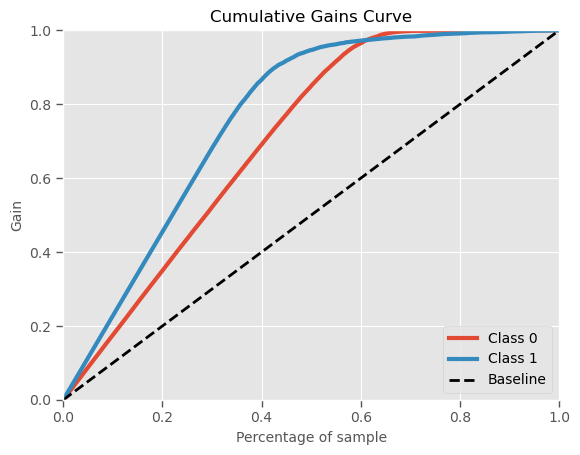

In [120]:
# Evaluate confusion matrix
print("\033[1m"+'Boosting Model Matrix: \
'+"\033[1m")
print(classificationSummary(y, back_boost.predict(backX_scaled)))

# Evaluate performance
print("\n\033[1m" + 'Boosting Model Performance:' + "\033[1m\n")
print(classification_report(y, back_boost.predict(backX_scaled)))

# Check Gains Chart
back_boost_probas = back_boost.predict_proba(backX_scaled)
skplt.metrics.plot_cumulative_gain(y, back_boost_probas)
plt.show()

<div class="alert alert-block alert-info">
    <b>Boost Accuracy:</b> 92%
</div>

<div class="alert alert-block alert-info">
    <b>Boost F1-Score:</b> 91%
</div>


**[K-Nearest Nieghbors]**

The modeling of the K-Nearest Neighbors model yielded very positive results with accuracy and precision scores of 94% and 96%, respectively. However, such high accuracy scores may imply that the models were over fit on the data. This will be checked on two feature subsets, one based on the Random Forest feature importance analysis conducted, and one based on the backward elimination of all features that was used to build the baseline model.

Evaluating the best KNN model on both subsets of features yields super high results in terms of all evaluation metrics including accuracy, precision, and recall. In fact, the model using the baseline elimination features was 100% accurate, making it highly likely that overfitting has occurred. In order to address this over-fitting issue in the future regularization can be added when modeling and/or drop-out features that set random variables to zero can be used.

KNN Model Matrix: 
Confusion Matrix (Accuracy 0.9262)

       Prediction
Actual     0     1
     0 14040   533
     1  1384 10019
None

KNN Model Performance:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14573
           1       0.95      0.88      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



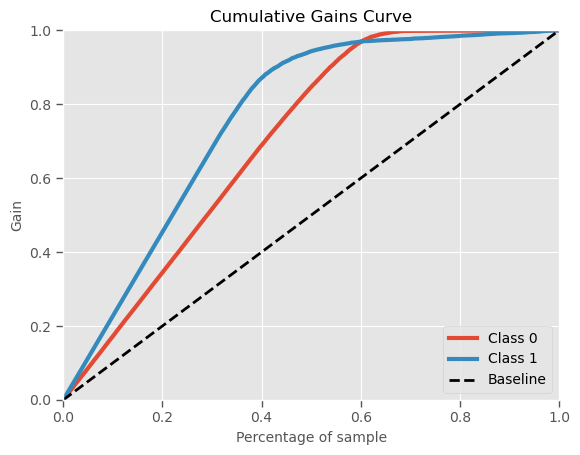

In [121]:
# Evaluate confusion matrix
print("\033[1m"+'KNN Model Matrix: \
'+"\033[1m")
print(classificationSummary(y, back_knn.predict(backX_scaled)))

# Evaluate performance
print("\n\033[1m" + 'KNN Model Performance:' + "\033[1m\n")
print(classification_report(y, back_knn.predict(backX_scaled)))

# Check Gains Chart
back_knn_probas = back_knn.predict_proba(backX_scaled)
skplt.metrics.plot_cumulative_gain(y, back_knn_probas)
plt.show()

<div class="alert alert-block alert-info">
    <b>KNN Accuracy:</b> 93%
</div>

<div class="alert alert-block alert-info">
    <b>KNN F1-Score:</b> 91%
</div>


<h2><center>Results</center></h2> 

 The final models, fine-tuned to the optimal parameters derived during the modeling phase were put to the test on the test data set we had set aside. The features used in the models that were tested were the same ones that were produced by the backward elimination process during our baseline model construction. Essentially these were all of the features initially present in the data set, excluding Age, Departure Delay in Minutes, and Flight Distance. It makes sense why Age and Flight Distance are not deemed deterministic of customer satisfaction because there is no way the airlines can be held accountable for such characteristics. Surprisingly, it was determined that Arrival Delay in Minutes was more indicative of customer satisfaction in regards to air travel as opposed to departure delays. 
 
 In order to evaluate these models performance metrics were not limited to accuracy alone, but included precision, recall, and the f1-score as well. After the relevant data preparation was conducted on the test data predictors, each model was analyzed based on its predictive capabilities. With the objective of understanding what influences passenger satisfaction when during air travel in mind, the precision performance metric was a key interest because it analyzes a model's ability to predict true positives in respect to the combination of true and false positives. Simply put, precision looks at the effectiveness of predicting a satisfied customer. The results of all model performances were surprisingly similar, if not practically identical, but the neural net model came out on top. It out-performed the other two models in F1 and Recall score when predicting satisfaction, tied the KNN model in Precision, and had the highest overall Accuracy at 93.57%.

<h2><center>Discussion and Recommendations</center></h2> 

The nature of the data mining was to provide airlines with the means to leverage data in order to decrease the amount of customers that are unsatisfied with the service. Being able to model the different relationships in this dataset is important for choosing the proper model. One of the strengths in this project comes from the dataset. The dataset had very few missing values which increased the models’ ability to perform better with all of the data available. Another strength was the type of data we had available. This dataset was easy to process in preparation for modeling. However, the size of the dataset brought limitations. Due to the large number of samples, certain algorithms and methods had to be carefully chosen and tuned in order to avoid overfitting on the data. Of course, some models did overfit the data as those models perform better on smaller datasets.

In order to prove our models’ success, we needed to return a higher score than the baseline. The baseline logistic regression model achieved an accuracy score of 87.35%. All of the models were able to outperform the baseline model accuracy with some exceptions of overfitted models. However, to determine the best performance, we cannot base our performance solely on a single metric. Therefore, this project is reliant on an optimal value for the F-1 score, meaning we choose a balance between both the positive and negative classes as our factor for choosing a model. The neural, was selected as the best model for this project. The neural network outperformed every model in every metric measured yielding an accuracy of 94% and an F1-score of 92% capturing both classes accurately. Deploying a neural network will be able to capture non-linearities in the data, predict customer disatisfaction as they fly in different airlines, before the fact due to the F1-score when compared to other methods.

After determining what are the reasons customers are disatisfied with airlines, and to reduce the number of disatisifed customers, we propose the following suggestions. Airlines should offer inflight wifi. Everyione now carries their smart phones or laptops, meaning lots of customers would rather do something productive on their devices rather than nothing at all. Next, having a smooth transition for online booking, can help increase customer satisfaction. It can reduce the stress of traveling. Another important factor, is the seat comfort. By offering better seats, more seat ammenties and leg room, customers will have a more enjoyable flight experience. Inflight entertainment is also an important indicator to airlines disatisfaction. By improving inflight entertainment and offering more services, from movies to shows, this can improve customer satisfaction rates for airlines.

<h3><center>References</center></h3>

*Revenue of airlines worldwide 2003-2022*. (2022, July 27). Statista. Retrieved October 16, 2022, from https://www.statista.com/statistics/278372/revenue-of-commercial-airlines-worldwide/ 

Sharma, S. (2021, July 4). *Activation Functions in Neural Networks - Towards Data Science*. Medium. Retrieved October 17, 2022, from https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6 

Shmueli, G., Bruce, P. C., Gedeck, P., & Patel, N. R. (2019, November 5). *Data Mining for Business Analytics: Concepts, Techniques and Applications in Python (1st ed.)*. Wiley. 

*Tuning the Hyperparameters and Layers of Neural Network Deep Learning*. (2021, May 26). Analytics Vidhya. Retrieved October 17, 2022, from https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/